# COMPSCI 389: Introduction to Machine Learning
# Topic 8.0 Data Cleaning Introduction

The code below runs gradient descent to minimize the sample mean squared error when using a linear parametric model, with the second-degree (order) polynomial basis. The first code block defines the various functions for this. I recommend skipping down to the next markdown block.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# Function to calculate mean squared error
def mean_squared_error(predictions, labels):
    return np.mean((predictions - labels) ** 2)

# Function to calculate gradients
def compute_gradients(X, y, weights):
    predictions = X.dot(weights)
    errors = predictions - y
    return 2 / X.shape[0] * X.T.dot(errors)

# Function for gradient descent
def gradient_descent(X, y, learning_rate, iterations, polynomial_degree):
    # Expand features into polynomial basis
    poly = PolynomialFeatures(degree=polynomial_degree)
    X_poly = poly.fit_transform(X)

    # Initialize weights
    weights = np.zeros(X_poly.shape[1])
    loss_history = []

    loss = mean_squared_error(X_poly.dot(weights), y)
    print(f"Iteration 0/{iterations}, Loss: {loss:.4f}")

    for i in range(iterations):
        gradients = compute_gradients(X_poly, y, weights)
        weights -= learning_rate * gradients
        loss = mean_squared_error(X_poly.dot(weights), y)
        loss_history.append(loss)
        print(f"Iteration {i+1}/{iterations}, Loss: {loss:.4f}")

    return weights, loss_history

# Function to make predictions
def predict(X, weights):
    poly = PolynomialFeatures(degree=polynomial_degree)
    X_poly = poly.fit_transform(X)
    return X_poly.dot(weights)

# Load the data set
df = pd.read_csv("data/GPA.csv", delimiter=',')

# Split the data into features and labels
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True)

def run(alpha):
    # Parameters for gradient descent
    iterations = 1000
    polynomial_degree = 2

    # Run gradient descent
    weights, loss_history = gradient_descent(X_train, y_train, alpha, iterations, polynomial_degree)

    # Plotting the loss over iterations
    plt.plot(range(1, iterations + 1), loss_history)
    plt.xlabel('Iterations')
    plt.ylabel('Mean Squared Error')
    plt.yscale('log')
    plt.title(f'Gradient Descent Loss, Polynomial Degree: {polynomial_degree}')
    plt.show()

    # Predict on the test set
    predictions = predict(X_test, weights)

    # Calculate MSE on the test set
    mse_test = mean_squared_error(predictions, y_test)
    print(f"Test MSE: {mse_test:.4f}")

    # Calculate the standard error of the MSE
    squared_errors = (predictions - y_test) ** 2
    std_error = np.std(squared_errors) / np.sqrt(len(squared_errors))
    print(f"Standard Error of MSE: {std_error:.4f}")


The `run` function takes the step size (learning rate) `alpha` as its one argument. It then runs 1,000 iterations of gradient descent on the GPA data set using the second-degree polynomial basis. Let's recreate the plot from the last lecture!

(Note: nan and inf can cause some errors, so don't worry if you see some errors below.)

Iteration 0/1000, Loss: 8.4368
Iteration 1/1000, Loss: 0.8292
Iteration 2/1000, Loss: 0.7914
Iteration 3/1000, Loss: 0.7893
Iteration 4/1000, Loss: 0.7874
Iteration 5/1000, Loss: 0.7856
Iteration 6/1000, Loss: 0.7838
Iteration 7/1000, Loss: 0.7820
Iteration 8/1000, Loss: 0.7803
Iteration 9/1000, Loss: 0.7786
Iteration 10/1000, Loss: 0.7770
Iteration 11/1000, Loss: 0.7753
Iteration 12/1000, Loss: 0.7737
Iteration 13/1000, Loss: 0.7722
Iteration 14/1000, Loss: 0.7706
Iteration 15/1000, Loss: 0.7691
Iteration 16/1000, Loss: 0.7676
Iteration 17/1000, Loss: 0.7662
Iteration 18/1000, Loss: 0.7648
Iteration 19/1000, Loss: 0.7634
Iteration 20/1000, Loss: 0.7620
Iteration 21/1000, Loss: 0.7606
Iteration 22/1000, Loss: 0.7593
Iteration 23/1000, Loss: 0.7580
Iteration 24/1000, Loss: 0.7568
Iteration 25/1000, Loss: 0.7555
Iteration 26/1000, Loss: 0.7543
Iteration 27/1000, Loss: 0.7531
Iteration 28/1000, Loss: 0.7519
Iteration 29/1000, Loss: 0.7508
Iteration 30/1000, Loss: 0.7496
Iteration 31/1000,

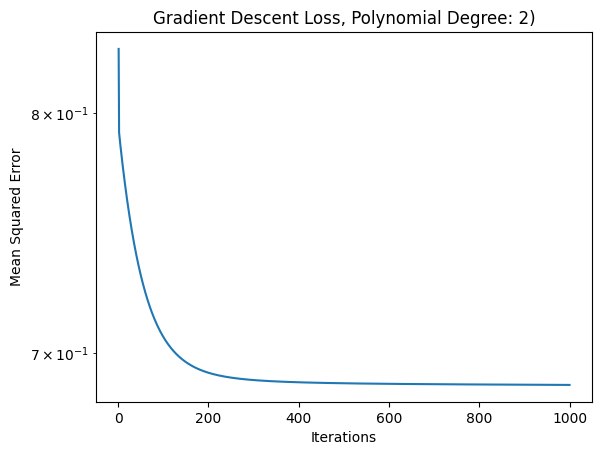

NameError: name 'polynomial_degree' is not defined

In [7]:
alpha = 0.0000000000001
run(alpha)

**Question**: What went wrong, and how can we fix it?